# Singular Value Decomposition (SVD) for Image Compression


Most of this [code](http://www.frankcleary.com/svdimage/) has been repackaged as a function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

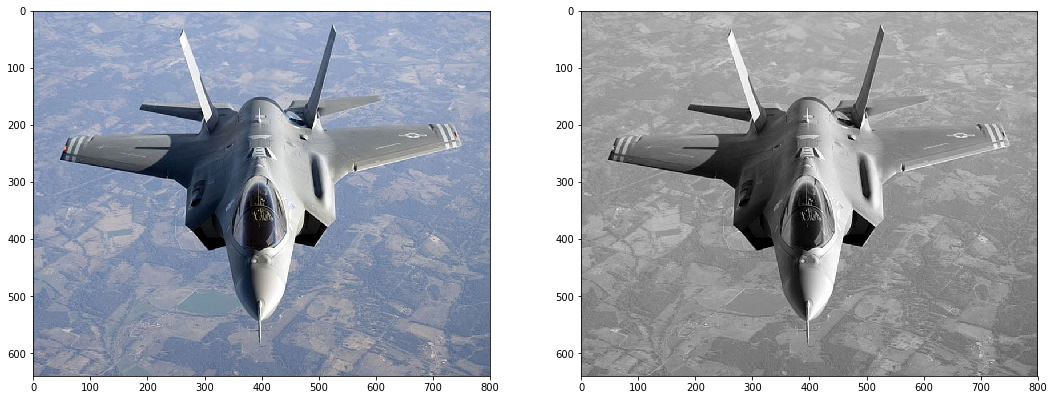

In [2]:
# Read image and convert to grayscale
img = Image.open('f35.jpg')
imggray = img.convert('LA')

fig = plt.figure(figsize=(18, 12)) ## Figure object
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(imggray);

Let's have a look at the shape of the image. It's 640x800 and either 3 (RGB) or 2 (Greyscale/LA)

In [3]:
print("Colorize: ",np.array(img).shape)
print("Greyscale: ",np.array(imggray).shape)

Colorize:  (640, 800, 3)
Greyscale:  (640, 800, 2)


In [5]:
def image_to_svd_components(path, num_comps=5):
    '''
    Takes a jpeg image and outputs an image with the number of specified components.
    
    Parameters
    ----------
    path: string
        path where jpeg image is located
    
    num_comps: int, optional, default: 5 
        number of svd components to include
    
    Returns
    ----------
    image
    '''
    
    # get image and convert to grayscale
    img = Image.open(path)
    imggray = img.convert('LA')
    
    # convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)
    
    U, sigma, V = np.linalg.svd(imgmat)
    
    reconst_img = np.matrix(U[:, :num_comps]) * np.diag(sigma[:num_comps]) * np.matrix(V[:num_comps, :])
    print("Image Shape: ", np.array(reconst_img).shape)

    return plt.imshow(reconst_img, cmap='gray')

Image Shape:  (640, 800)


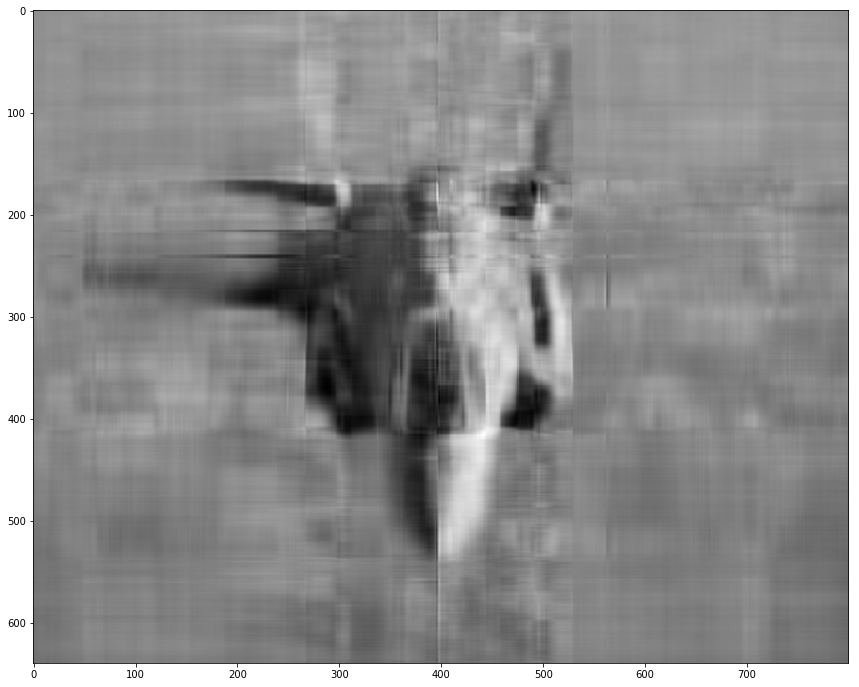

In [6]:
# 10 Components
plt.figure(figsize=(18, 12))
image_to_svd_components('f35.jpg', 10);

Image Shape:  (640, 800)


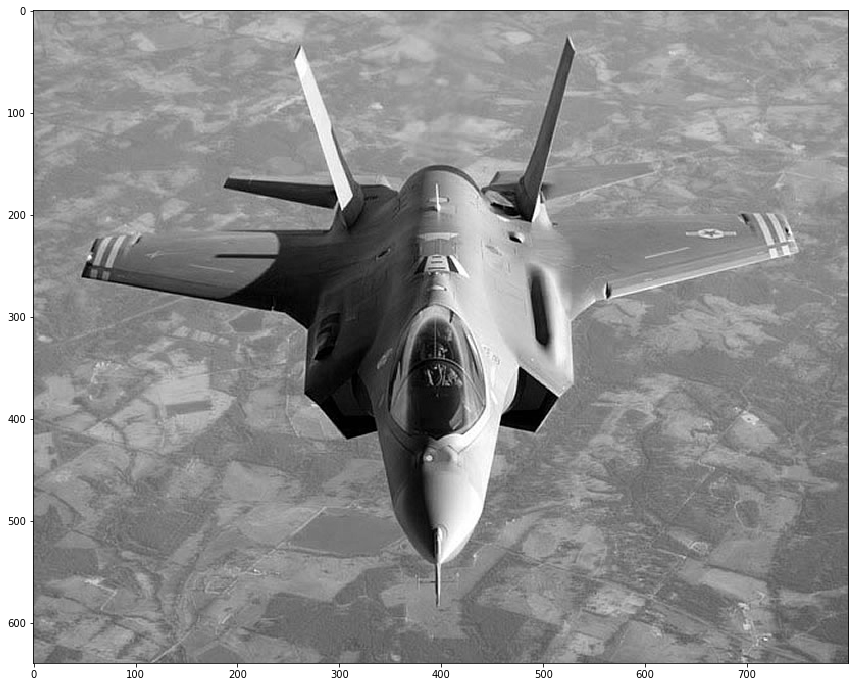

In [7]:
# All 640 Components
plt.figure(figsize=(18, 12))
image_to_svd_components('f35.jpg', 640);

Let's pull the math out of the function and see why this works out.

In [8]:
num_comps = 10
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)

U, sigma, V = np.linalg.svd(imgmat)
reconst_img = np.matrix(U[:, :num_comps]) * np.diag(sigma[:num_comps]) * np.matrix(V[:num_comps, :])

In [9]:
print("--- Matrix Shapes ---")
print("U: ", U.shape)
print("sigma: ", np.diag(sigma).shape)
print("V: ", V.shape)

--- Matrix Shapes ---
U:  (640, 640)
sigma:  (640, 640)
V:  (800, 800)


In [10]:
u_prime, sigma_prime, v_prime = np.matrix(U[:, :num_comps]), np.diag(sigma[:num_comps]), np.matrix(V[:num_comps, :])

In [11]:
print("--- Recon. Matrix Shapes ---")
print("U: ", u_prime.shape)
print("sigma: ", sigma_prime.shape)
print("V: ", v_prime.shape)

--- Recon. Matrix Shapes ---
U:  (640, 10)
sigma:  (10, 10)
V:  (10, 800)


When we extract the component matrices, they align in such a way that the multiplication works out - we get back the original image size, but now we've only accounted for 10 principle components. We've lost some information (we can't get back the EXACT matrix), but we've maintained the structure of the image and **some** of the information.

In [12]:
print('--- Number of Values to Store ---')
print("Full image: ",640*800)
print("Reduced Image: ", 640*10+10+10*800)

--- Number of Values to Store ---
Full image:  512000
Reduced Image:  14410


If we throw in 200 components, we can see that the image quality if very similar to the original - but we still can store less data overall. If each pixel were stored as a float (16 bits = 2 bytes), the difference would be from 1.024 MB to 576.4 kB. 

Image Shape:  (640, 800)
--- Number of Values to Store ---
Full image:  1024000 bytes
Reduced Image:  576400 bytes


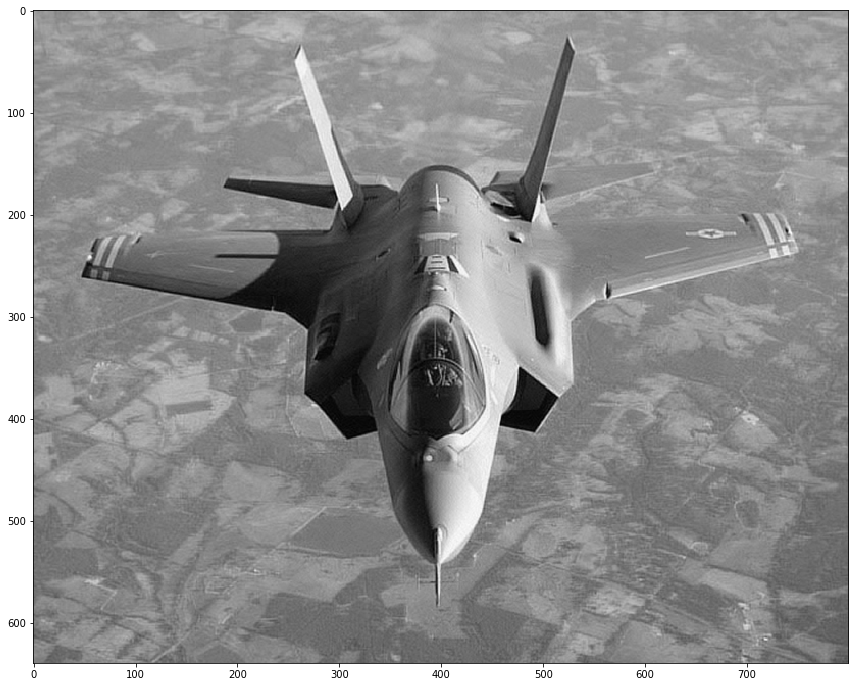

In [13]:
# Try 200 Components
num_comp = 200
plt.figure(figsize=(18, 12))
image_to_svd_components('f35.jpg', num_comp);
print('--- Number of Values to Store ---')
print("Full image: ", "%s bytes"% (640*800*2))
print("Reduced Image: ", "%s bytes"% ((640*num_comp+num_comp+num_comp*800)*2))

Up to 355 dimensions, you are compressing!
Image Shape:  (640, 800)


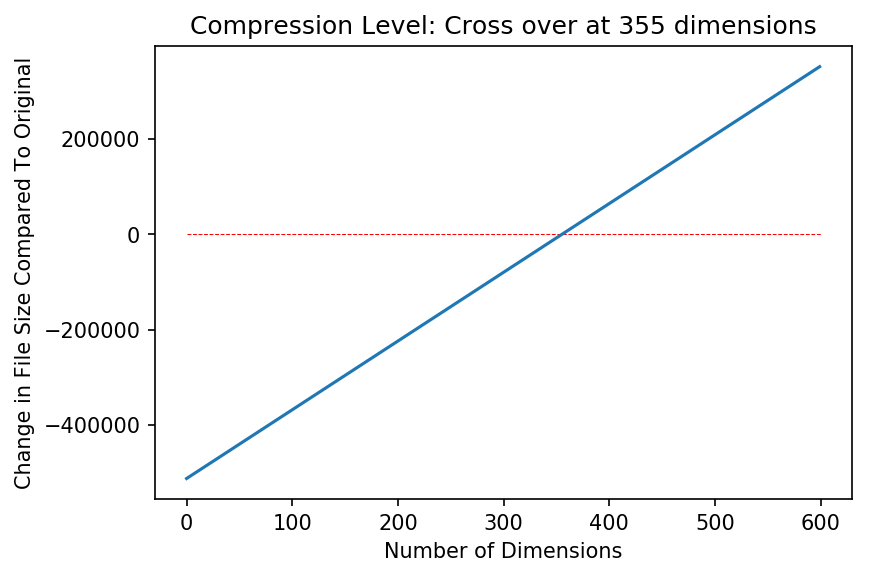

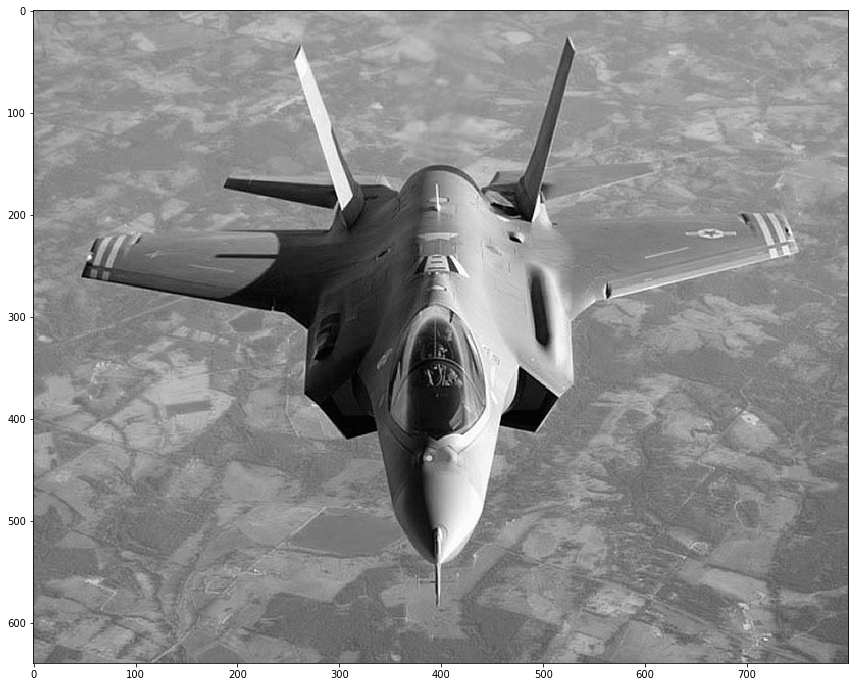

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
X = range(600)
Y = []
prevy = 0
dims_to_use = 10
for x in X:
    y = x + 640*x + 800*x - 640*800
    Y.append(y)
    if prevy < 0 and y >= 0:
        print("Up to %s dimensions, you are compressing!"% (x-1))
        dims_to_use = x-1
    prevy = y
plt.figure(dpi=150)
plt.plot([0,600],[0,0],'r--',lw=0.5)
plt.plot(X,Y)
plt.title("Compression Level: Cross over at {} dimensions".format(dims_to_use))
plt.xlabel("Number of Dimensions")
plt.ylabel("Change in File Size Compared To Original")
plt.figure(figsize=(18, 12))
plt.grid(False)
image_to_svd_components('f35.jpg', dims_to_use);